In [2]:
import pandas as pd
import chart_studio.plotly as py
import plotly.express as px
import math
import sys
import json
import argparse
import pandas as pd
import numpy as np
import scipy.signal as signal
from sklearn import decomposition, preprocessing  
from mpl_toolkits.mplot3d import Axes3D  
import cv2
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('~/CSI_DATA/movement/test2.csv')

In [6]:
fig = px.line(data, x ='local_timestamp', y = 'rssi')
fig.show()

In [53]:
# only plot useful subcarrier channel
select_list = []
select_list += [i for i in range(5, 31)]
select_list += [i for i in range(33, 58)]
select_list += [i for i in range(66, 122)]
select_list += [i for i in range(123, 191)]
select_list.remove(128)

print(len(select_list) )

174


(0.0, 803.0, -100.0, 0.0)

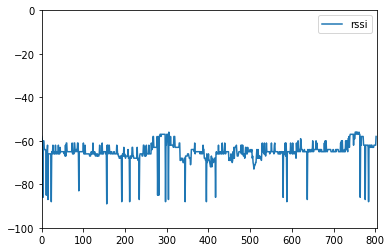

In [21]:
## Plotting rssi ..

df_rssi = data.loc[:, ['rssi']]
df_rssi.plot(y=['rssi'])
plt.axis([0, len(df_rssi.index), -100, 0])

In [7]:
### hampel filter ..

def hampel(X):
    """ hampel filter to remove outliers
    :param :one of the wifi packet with all real and imag of subcarriers
    :return:wifi packets after removing outliers
    """
    length = X.shape[0] - 1
    k = 3
    nsigma = 3
    iLo = np.array([i - k for i in range(0, length + 1)])
    iHi = np.array([i + k for i in range(0, length + 1)])
    iLo[iLo < 0] = 0
    iHi[iHi > length] = length
    xmad = []
    xmedian = []
    for i in range(length + 1):
        w = X[iLo[i]:iHi[i] + 1]
        medj = np.median(w)
        mad = np.median(np.abs(w - medj))
        xmad.append(mad)
        xmedian.append(medj)
    xmad = np.array(xmad)
    xmedian = np.array(xmedian)
    scale = 1.4826
    xsigma = scale * xmad
    xi = ~(np.abs(X - xmedian) <= nsigma * xsigma) 

    xf = X.copy()
    xf[xi] = xmedian[xi]
    return xf

def normalize(csi_array):
    """ normalize all amplitudes into [0, 1]
    :param csi_array:
    :return: normalized csi amplitude array
    """
    array_csi_modulus = preprocessing.scale(csi_array)
    standardScalar = preprocessing.MinMaxScaler()
    standardScalar.fit(array_csi_modulus)
    array_csi_normalized = standardScalar.transform(array_csi_modulus)

    return array_csi_normalized

def decompose(array_csi_modulus, dimensions):
    """decomposition
    :param array_csi_modulus: normalized csi amplitude array
    :param dimensions: the shape you decompose the data
    :return:
    """
    pca = decomposition.PCA(n_components=dimensions)  # FA, FICA, MBDL
    CSI = normalize(array_csi_modulus)
    CSI = pca.fit_transform(CSI)
    return CSI

(1326, 192)


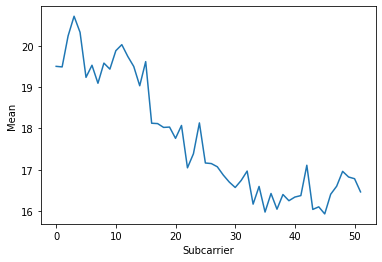

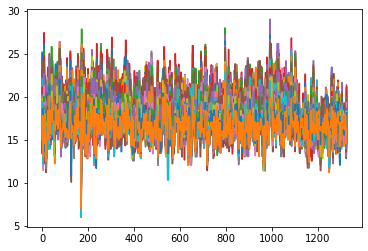

In [22]:
## Calculating CSI 

filepath= '~/temp.csv'
df = pd.read_csv(filepath)

df_csi = df.loc[:, ['len', 'CSI_DATA']]
drop_idx = []
for i in range(df_csi.shape[0]):
  if df_csi.iloc[i]['len'] < 384:
    drop_idx.append(i)

df_csi = df_csi.drop(drop_idx)
size_x = len(df_csi.index)
size_y = df_csi.iloc[0]['len']//2 # no. of subcarriers ..

array_csi = np.zeros([size_x, size_y], dtype = np.complex64)

for x , csi in enumerate(df_csi.iloc):
    temp = csi["CSI_DATA"].replace(' ', ',')
    temp = temp.replace(',]', ']')
    csi_raw_data = json.loads(temp)
    for y in range(0, len(csi_raw_data), 2):
        array_csi[x][y//2] = complex(csi_raw_data[y], csi_raw_data[y + 1])  # IQ channel frequency response
array_csi_modulus = abs(array_csi)  # amplitude calculating
print(array_csi_modulus.shape)
drop_idx = [0, 1]
for i in range(array_csi_modulus.shape[1]):
  if (np.var(array_csi_modulus[:, i]) < 1e-3):
    drop_idx.append(i)

array_csi_modulus = np.delete(array_csi_modulus, drop_idx, axis=1)
array_csi_modulus.shape
plt.ylabel("Mean")
plt.xlabel("Subcarrier")
plt.plot(np.mean(array_csi_modulus, axis=0))
plt.show()
plt.plot(array_csi_modulus)

In [29]:
df = pd.DataFrame(array_csi_modulus, columns=range(array_csi_modulus.shape[1]))
df
fig = px.line(df, y = list(range(52)),
                title="CSI Magnitude"
              
             )

fig.show()

In [13]:
drop_idx

[0,
 1,
 2,
 3,
 4,
 5,
 32,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191]

IndexError: index 59 is out of bounds for axis 0 with size 52

In [15]:
csi_mod_filtered = array_csi_modulus.copy()
# for y in range(array_csi_modulus.shape[1]):
#     csi_mod_filtered[:,y] = hampel(array_csi_modulus[:,y])

# plt.title("Hampel Filter for Outlier Removal")
# plt.xlabel("Sample")
# plt.ylabel("Amplitude")
# plt.plot(array_csi_modulus[:,23], label = "Unfiltered")    
# plt.plot(csi_mod_filtered[:,23], label = "Hampel Filter")
# plt.legend()
# plt.show()

In [16]:
csi_PCA = decompose(csi_mod_filtered, dimensions = 5)

print(csi_PCA.shape)

csi_PCA_df = pd.DataFrame(csi_PCA, columns = ['PC1','PC2','PC3','PC4','PC5'])
csi_PCA_df['local_timestamp'] = df['real_timestamp']

fig = px.line(csi_PCA_df, x ='local_timestamp', y = ['PC1','PC2','PC3','PC4','PC5'],labels={"local_timestamp": "samples", "PC4": "CSI magnitude"},
                title="CSI Magnitude"
              
             )

fig.show()

(690, 5)


/Users/aayush/miniforge3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.

/Users/aayush/miniforge3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:211: UserWarning:

Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 



In [14]:
drop_idx

[0, 1, 0, 1, 2, 3, 4, 5, 32, 59, 60, 61, 62, 63, 64, 65, 191]

In [50]:
len(drop_idx)

18